**Mount the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Path to TON_IoT Network Dataset**

In [2]:
ton_iot_path = "/content/drive/MyDrive/MedSecureAI - Cybersecurity Team/MOP_UseCase11_Project/datasets/TON_IoT/Train_Test_datasets/Train_Test_Network_dataset/train_test_network.csv"

**Load the CSV**

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv(ton_iot_path)

# Preview the dataset
df.head()


,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


**Basic Dataset Statistics and Info**

In [4]:
# Summary of the dataset
df.info()

# Describe numerical columns
df.describe()

# Check for missing/null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  211043 non-null  object 
 1   src_port                211043 non-null  int64  
 2   dst_ip                  211043 non-null  object 
 3   dst_port                211043 non-null  int64  
 4   proto                   211043 non-null  object 
 5   service                 211043 non-null  object 
 6   duration                211043 non-null  float64
 7   src_bytes               211043 non-null  int64  
 8   dst_bytes               211043 non-null  int64  
 9   conn_state              211043 non-null  object 
 10  missed_bytes            211043 non-null  int64  
 11  src_pkts                211043 non-null  int64  
 12  src_ip_bytes            211043 non-null  int64  
 13  dst_pkts                211043 non-null  int64  
 14  dst_ip_bytes        

,0
src_ip,0
src_port,0
dst_ip,0
dst_port,0
proto,0
service,0
duration,0
src_bytes,0
dst_bytes,0
conn_state,0


 Target Label Distribution

In [5]:
print(df['label'].value_counts())


label
1    161043
0     50000
Name: count, dtype: int64


**VISUALIZE THE CLASS IMBALANCE**

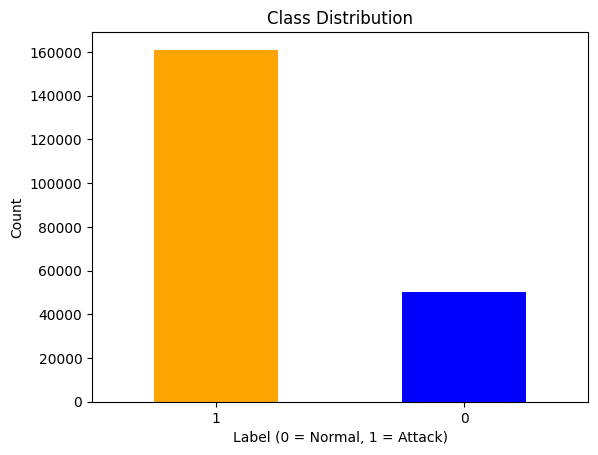

In [6]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Class Distribution')
plt.xlabel('Label (0 = Normal, 1 = Attack)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Rename Labels for Clarity**

In [7]:
df['label'] = df['label'].replace({0: 'Normal', 1: 'Attack'})


**Plot again (with renamed labels)**

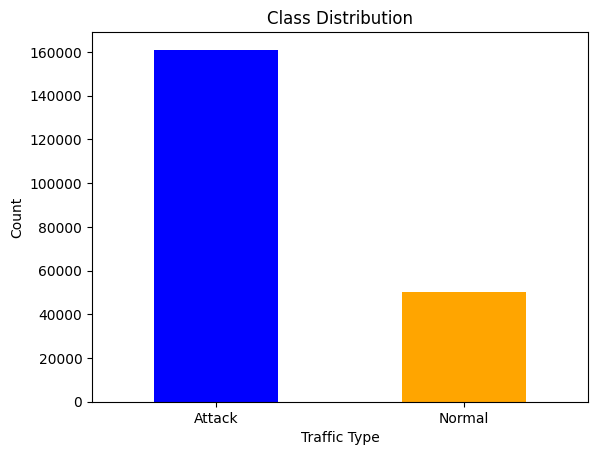

In [8]:
df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Check for Missing Values**

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])


Missing values per column:
 Series([], dtype: int64)


**Data Types & Cardinality**

In [10]:
# Check data types
print(df.dtypes)

# Check unique values per column
print(df.nunique().sort_values())


src_ip                     object
src_port                    int64
dst_ip                     object
dst_port                    int64
proto                      object
service                    object
duration                  float64
src_bytes                   int64
dst_bytes                   int64
conn_state                 object
missed_bytes                int64
src_pkts                    int64
src_ip_bytes                int64
dst_pkts                    int64
dst_ip_bytes                int64
dns_query                  object
dns_qclass                  int64
dns_qtype                   int64
dns_rcode                   int64
dns_AA                     object
dns_RD                     object
dns_RA                     object
dns_rejected               object
ssl_version                object
ssl_cipher                 object
ssl_resumed                object
ssl_established            object
ssl_subject                object
ssl_issuer                 object
http_trans_dep

Drop Unnecessary Features

In [11]:
df = df.drop(['src_ip', 'dst_ip', 'src_port'], axis=1)


**Encode Categorical Features**

In [12]:
df['dst_port'].value_counts().head(10)


,count
dst_port,
80,70673
53,34589
445,13449
8080,10329
443,7587
21,5880
5353,3505
51782,3363
10502,3353


**Identify Categorical Columns for Encoding**

In [13]:
df.dtypes.value_counts()


,count
object,26
int64,14
float64,1


In [14]:
df.select_dtypes(include='object').columns


Index(['proto', 'service', 'conn_state', 'dns_query', 'dns_AA', 'dns_RD',
       'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

**Drop unneeded categorical columns**

In [15]:
# Drop unneeded categorical columns
drop_cols = [
    'dns_query', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected',
    'weird_name', 'weird_addl', 'weird_notice', 'label', 'type'
]
df = df.drop(columns=drop_cols)

# Encode useful categorical features
from sklearn.preprocessing import LabelEncoder

# You can also use pd.get_dummies() for one-hot encoding if preferred
cat_cols = ['proto', 'service', 'conn_state', 'ssl_version', 'ssl_cipher',
            'ssl_resumed', 'ssl_subject', 'ssl_issuer',
            'http_method', 'http_version']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


**Checking DataFrame**

In [16]:
print(df.dtypes)
print(df.head())


dst_port                    int64
proto                       int64
service                     int64
duration                  float64
src_bytes                   int64
dst_bytes                   int64
conn_state                  int64
missed_bytes                int64
src_pkts                    int64
src_ip_bytes                int64
dst_pkts                    int64
dst_ip_bytes                int64
dns_qclass                  int64
dns_qtype                   int64
dns_rcode                   int64
ssl_version                 int64
ssl_cipher                  int64
ssl_resumed                 int64
ssl_established            object
ssl_subject                 int64
ssl_issuer                  int64
http_trans_depth           object
http_method                 int64
http_uri                   object
http_version                int64
http_request_body_len       int64
http_response_body_len      int64
http_status_code            int64
http_user_agent            object
http_orig_mime

**Check for Nulls**

In [17]:
print(df.isnull().sum().sum())


0


**Preview Final Columns**

In [18]:
print(df.columns)


Index(['dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes',
       'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts',
       'dst_ip_bytes', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'ssl_version',
       'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject',
       'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri',
       'http_version', 'http_request_body_len', 'http_response_body_len',
       'http_status_code', 'http_user_agent', 'http_orig_mime_types',
       'http_resp_mime_types'],
      dtype='object')


**Double-check for remaining 'object' columns**

In [19]:
print(df.select_dtypes(include='object').columns)


Index(['ssl_established', 'http_trans_depth', 'http_uri', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types'],
      dtype='object')


**Drop Few Columns**

In [20]:
df = df.drop(['ssl_established', 'http_trans_depth', 'http_uri', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types'], axis=1)


In [21]:
orig_path ="/content/drive/MyDrive/MedSecureAI - Cybersecurity Team/MOP_UseCase11_Project/datasets/TON_IoT/Train_Test_datasets/Train_Test_Network_dataset/train_test_network.csv"
df_label = pd.read_csv(orig_path)[['label']]


**Reset the index of your working DataFrame**

In [22]:
df = df.reset_index(drop=True)
df_label = df_label.reset_index(drop=True)


**Concatenate the label back to your working DataFrame**

In [23]:
df['label'] = df_label['label']


In [24]:
X = df.drop('label', axis=1)
y = df['label']


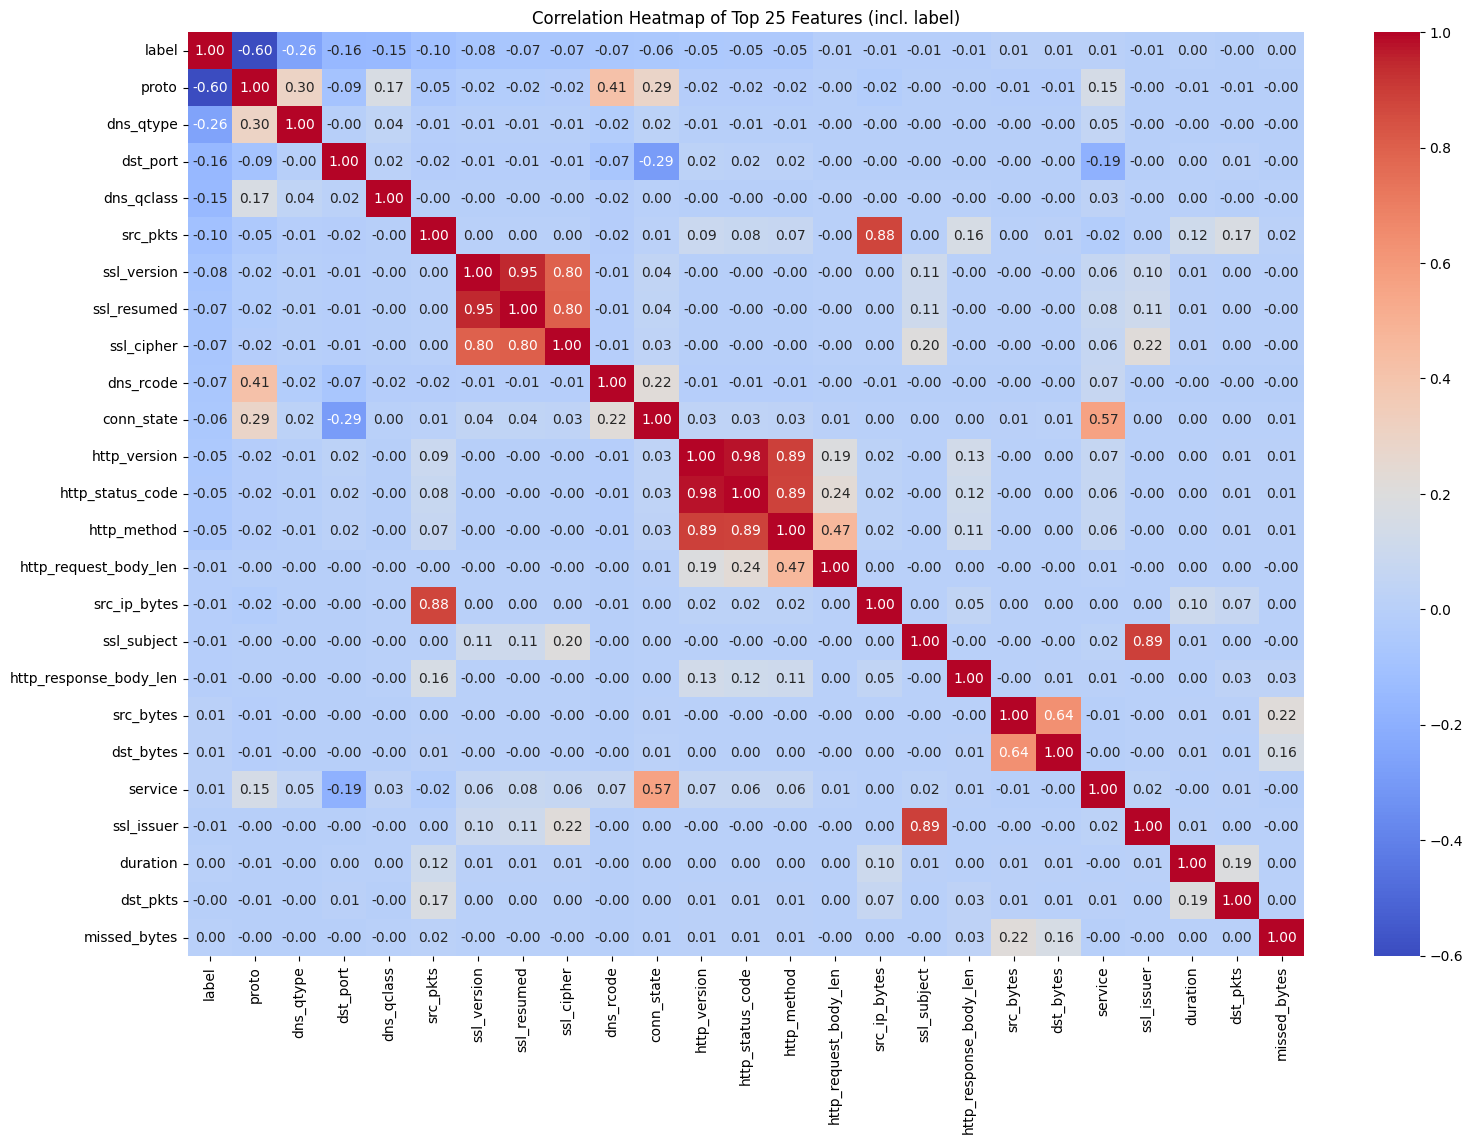

In [25]:
# Drop non-numeric columns (usually all 'object' dtypes)
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
# Show only the top 25 features most correlated with the label (if 'label' is still present)
if 'label' in corr.columns:
    top_corr_features = corr['label'].abs().sort_values(ascending=False).head(25).index
    sns.heatmap(df_numeric[top_corr_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Heatmap of Top 25 Features (incl. label)")
    plt.show()
else:
    # If 'label' is not numeric, just plot all
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()


**Correlation Heatmap**

**Drop Redundant Features**

In [26]:
drop_features = [
    'http_version',
    'http_method',
    'ssl_subject',
    'ssl_resumed',
    'http_request_body_len',
    'dst_bytes',
]

df = df.drop(columns=drop_features)


In [27]:
# Only keep numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=['number'])


**Plot the New Heatmap**

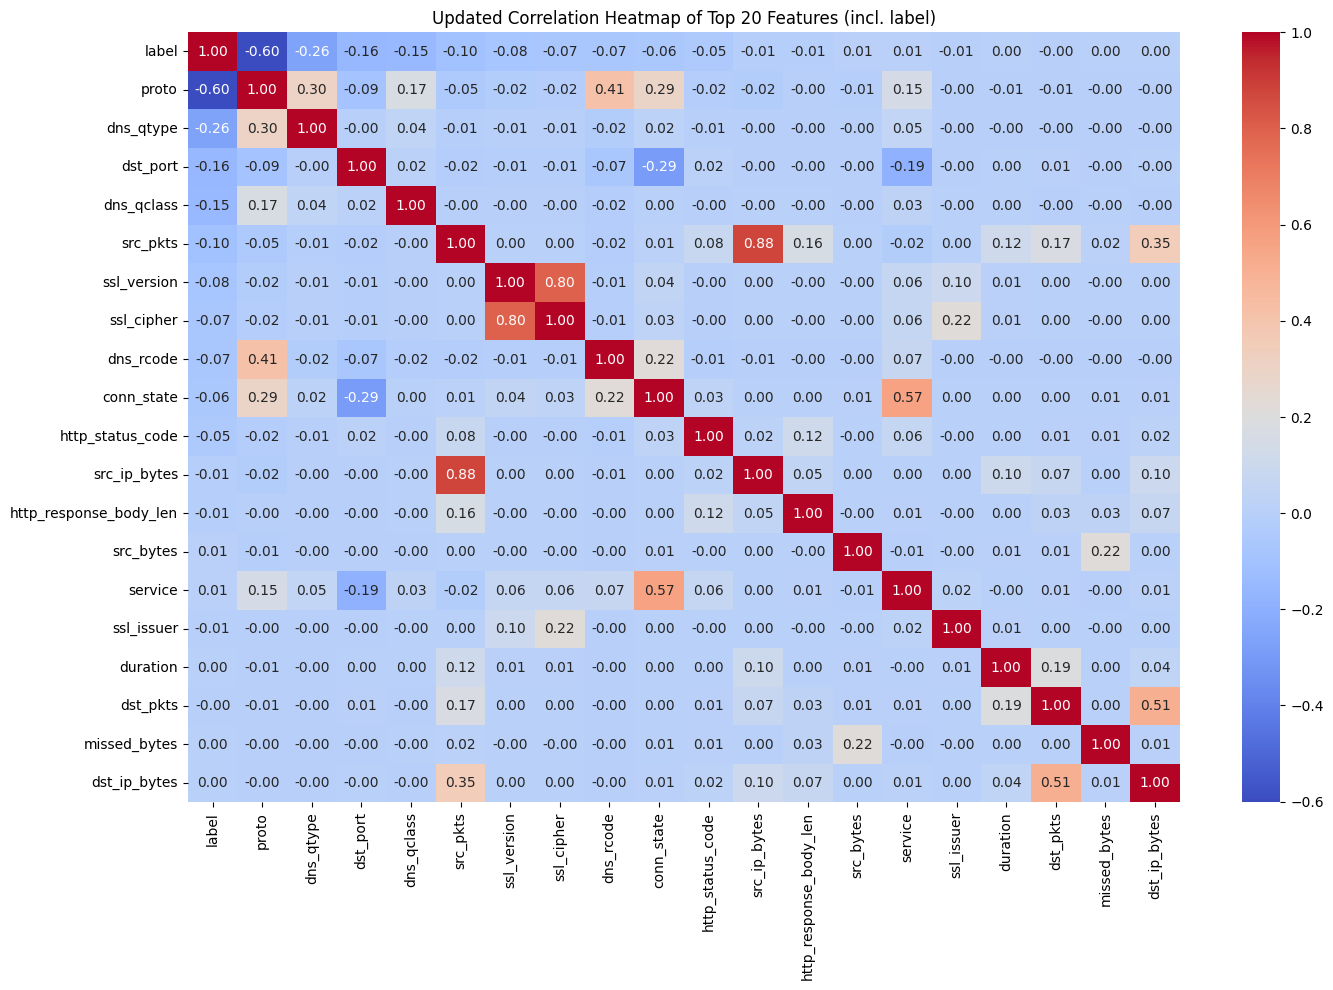

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
corr = df_numeric.corr()

# Show only the top 20 features most correlated with the label (if 'label' is still there)
top_corr_features = corr['label'].abs().sort_values(ascending=False).head(20).index
sns.heatmap(df_numeric[top_corr_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Updated Correlation Heatmap of Top 20 Features (incl. label)")
plt.show()


In [29]:
# Drop highly correlated feature(s)
drop_features = [
    'src_pkts'  # Drop this because it's highly correlated with both src_ip_bytes and src_bytes
    # Add more features here if you identify others in the future!
]

df = df.drop(columns=drop_features)


In [30]:
print(df.columns)


Index(['dst_port', 'proto', 'service', 'duration', 'src_bytes', 'conn_state',
       'missed_bytes', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'ssl_version', 'ssl_cipher',
       'ssl_issuer', 'http_response_body_len', 'http_status_code', 'label'],
      dtype='object')


In [31]:
# Drop 'label' to get features, use 'label' as target
X = df.drop('label', axis=1)
y = df['label']


In [32]:
from sklearn.preprocessing import LabelEncoder

for col in ['service', 'conn_state']:  # Add other relevant categorical columns here
    if df_numeric[col].dtype == 'object':
        le = LabelEncoder()
        df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))



In [33]:
X = df_numeric.drop('label', axis=1)
y = df_numeric['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

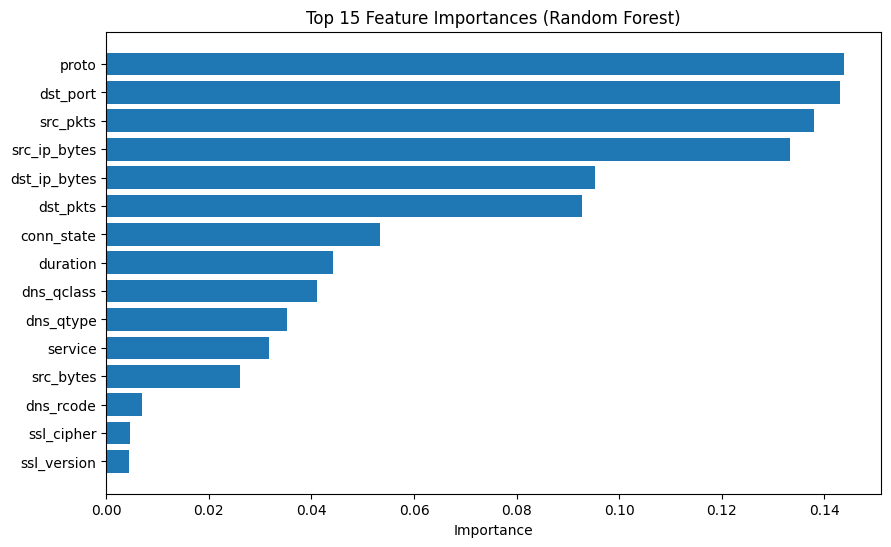

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

importances = clf.feature_importances_
feat_names = X.columns
fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'][:15][::-1], fi_df['importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



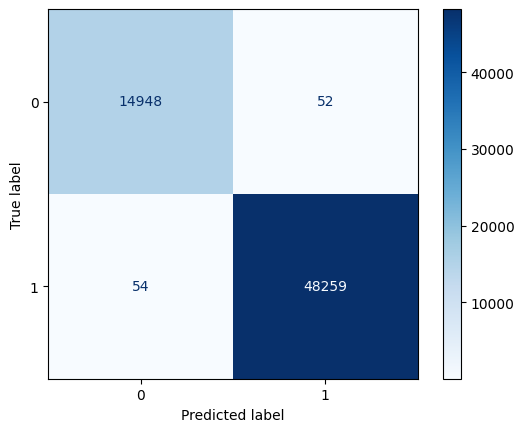

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assume X and y are your final feature matrix and label vector
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='f1')

print("Cross-validated F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())


Cross-validated F1 scores: [0.94620901 0.99521352 0.997278   0.98848615 0.99815117]
Mean F1 score: 0.9850675708252782


In [37]:
from sklearn.model_selection import train_test_split

# Try a new random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



In [38]:
import xgboost as xgb
from sklearn.metrics import classification_report

xgb_clf = xgb.XGBClassifier(scale_pos_weight=1, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



In [39]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 112730, number of negative: 35000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1855
[LightGBM] [Info] Number of data points in the train set: 147730, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



In [40]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7914 - loss: 294.6778 - val_accuracy: 0.8872 - val_loss: 285.5019
Epoch 2/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8911 - loss: 3.3333 - val_accuracy: 0.9152 - val_loss: 230.3164
Epoch 3/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8963 - loss: 5.7713 - val_accuracy: 0.8628 - val_loss: 205.6242
Epoch 4/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9212 - loss: 2.5263 - val_accuracy: 0.9449 - val_loss: 219.5222
Epoch 5/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9356 - loss: 2.2954 - val_accuracy: 0.9400 - val_loss: 171.4538
Epoch 6/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9164 - loss: 3.4321 - val_accuracy: 0.8902 - val_loss: 160.4538
Epoch 7/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9240 - loss: 3.3485 - val_accuracy: 0.9186 - val_loss: 192.6827
Epoch 8/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9293 - loss: 3.1046 - val_accurac

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



In [ ]:
# If you've already got X, y defined, skip this cell.
target_col = "label"
X = df.drop(columns=[target_col])
y = df[target_col]

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_tr.shape, X_te.shape, y_tr.value_counts(), y_te.value_counts()


((168834, 18),
 (42209, 18),
 label
 1    128834
 0     40000
 Name: count, dtype: int64,
 label
 1    32209
 0    10000
 Name: count, dtype: int64)

In [44]:
from sklearn.model_selection import train_test_split

# Assuming df_numeric is your processed DataFrame
X = df_numeric.drop('label', axis=1)  # features
y = df_numeric['label']               # target

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



RF 5-fold F1: [0.99846929 0.9988469  0.9988914  0.99889106 0.99855828] Mean: 0.9987313856552615
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



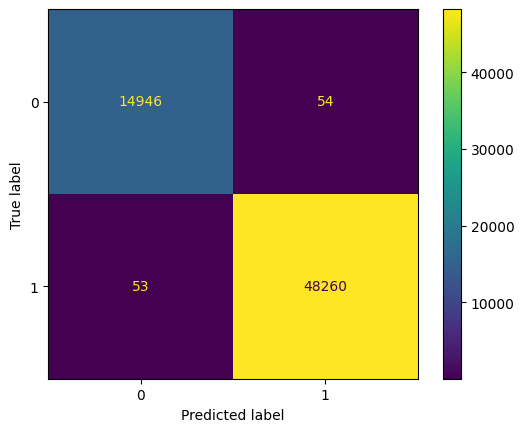

In [45]:
rf = RandomForestClassifier(
    n_estimators=200, max_depth=None, class_weight="balanced",
    n_jobs=-1, random_state=42
)
rf.fit(X_tr, y_tr)

# 5-fold CV on train
cv_f1 = cross_val_score(rf, X_tr, y_tr, cv=5, scoring="f1", n_jobs=-1)
print("RF 5-fold F1:", cv_f1, "Mean:", cv_f1.mean())

# Test set evaluation
y_pred = rf.predict(X_te)
print(classification_report(y_te, y_pred))

cm = confusion_matrix(y_te, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



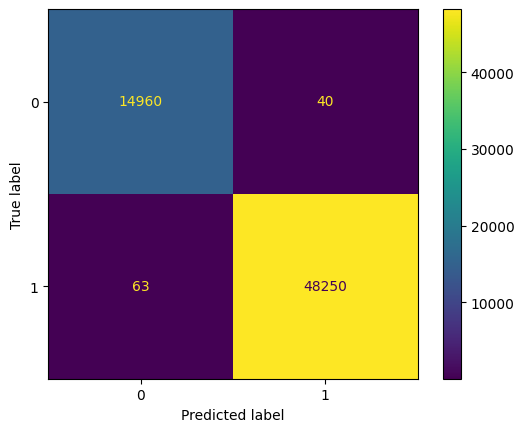

In [46]:
!pip -q install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

xgb_clf = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    tree_method="hist",  # fast on Colab CPU
    random_state=42
)
xgb_clf.fit(X_tr, y_tr)
y_pred_xgb = xgb_clf.predict(X_te)
print(classification_report(y_te, y_pred_xgb))

cm = confusion_matrix(y_te, y_pred_xgb)
ConfusionMatrixDisplay(cm).plot()
plt.show()


[LightGBM] [Info] Number of positive: 112730, number of negative: 35000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1860
[LightGBM] [Info] Number of data points in the train set: 147730, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



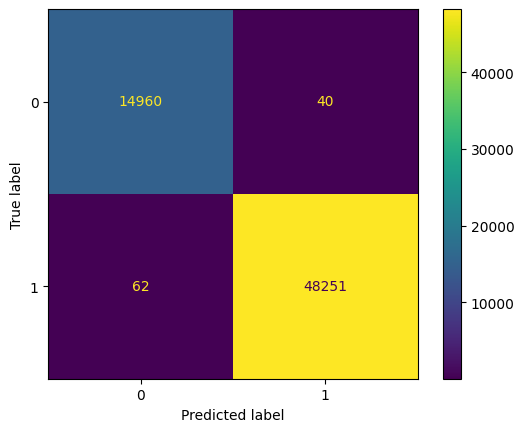

In [47]:
!pip -q install lightgbm
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

lgb_clf = lgb.LGBMClassifier(
    n_estimators=600,
    max_depth=-1,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.9,
    colsample_bytree=0.9,
    class_weight="balanced",
    random_state=42
)
lgb_clf.fit(X_tr, y_tr)
y_pred_lgb = lgb_clf.predict(X_te)
print(classification_report(y_te, y_pred_lgb))

cm = confusion_matrix(y_te, y_pred_lgb)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [48]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

models = {
    "RandomForest": rf,
    "XGBoost": xgb_clf,
    "LightGBM": lgb_clf
}

rows = []
for name, mdl in models.items():
    yhat = mdl.predict(X_te)
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_te, yhat),
        "F1": f1_score(y_te, yhat)
    })
leaderboard = pd.DataFrame(rows).sort_values("F1", ascending=False)
leaderboard


,Model,Accuracy,F1
2,LightGBM,0.998389,0.998944
1,XGBoost,0.998373,0.998934
0,RandomForest,0.998310,0.998893


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'subsample': 1.0, 'reg_lambda': 0.5, 'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     48313

    accuracy                           1.00     63313
   macro avg       1.00      1.00      1.00     63313
weighted avg       1.00      1.00      1.00     63313



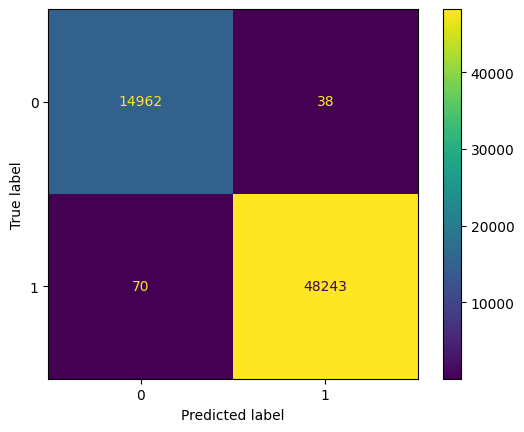

In [49]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "n_estimators": [300, 400, 600, 800],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "reg_lambda": [0.5, 1.0, 1.5, 2.0]
}
xgb_tuned = xgb.XGBClassifier(
    tree_method="hist", random_state=42, n_jobs=-1
)

search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search.fit(X_tr, y_tr)

print("Best params:", search.best_params_)
best_xgb = search.best_estimator_

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred_best = best_xgb.predict(X_te)
print(classification_report(y_te, y_pred_best))

cm = confusion_matrix(y_te, y_pred_best)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [50]:
# Rebuild from scratch if needed:
X_hold, X_main, y_hold, y_main = train_test_split(
    X, y, test_size=0.9, stratify=y, random_state=123  # 10% holdout
)
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(
    X_main, y_main, test_size=0.2, stratify=y_main, random_state=42
)

best_xgb2 = xgb.XGBClassifier(**search.best_params_, tree_method="hist", random_state=42)
best_xgb2.fit(X_tr2, y_tr2)

from sklearn.metrics import classification_report
print("Test split report:")
print(classification_report(y_te2, best_xgb2.predict(X_te2)))
print("HOLDOUT report:")
print(classification_report(y_hold, best_xgb2.predict(X_hold)))


Test split report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9000
           1       1.00      1.00      1.00     28988

    accuracy                           1.00     37988
   macro avg       1.00      1.00      1.00     37988
weighted avg       1.00      1.00      1.00     37988

HOLDOUT report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00     16104

    accuracy                           1.00     21104
   macro avg       1.00      1.00      1.00     21104
weighted avg       1.00      1.00      1.00     21104



In [ ]:
# ==== 1) Imports ====
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ==== 2) CONFIG ====
TARGET = "label"  # change if needed
DROP_COLS = ["src_ip", "dst_ip", "timestamp", "ts", "uid"]  # keep or edit to match your schema
TEST_SIZE = 0.3
RANDOM_STATE = 42
N_SPLITS = 5
MODEL_PATH = "rf_ton_iot_pipeline.joblib"

# ==== 3) Load / prepare dataframe ====
# If your dataframe is named df, keep this. Otherwise, replace with your variable.
# Assumes df has the TARGET column (binary 0/1).
df = df.copy()

# Drop non-learnable identifiers if they exist
for c in DROP_COLS:
    if c in df.columns:
        df = df.drop(columns=c)

# Keep only columns that aren't almost all missing
df = df[[c for c in df.columns if df[c].isna().mean() < 0.95]]

# Split features/target
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET])

# ==== 4) Preprocessing (no leakage) ====
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["number", "bool"]).columns.tolist()

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))  # sparse-friendly
])

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=True))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

# ==== 5) Estimator (class_weight to address imbalance) ====
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    n_jobs=-1,
    random_state=RANDOM_STATE
)

# ==== 6) Full Pipeline ====
pipe = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", rf)
])

# ==== 7) Train/test split (stratified) ====
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# ==== 8) Cross-validation on the training set (F1) ====
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
cv_f1 = cross_val_score(pipe, X_tr, y_tr, cv=cv, scoring="f1", n_jobs=-1)
print(f"RF {N_SPLITS}-fold F1:", cv_f1, "Mean:", cv_f1.mean())

# ==== 9) Fit and evaluate ====
pipe.fit(X_tr, y_tr)

# Test predictions
y_pred = pipe.predict(X_te)

# Probabilities for AUC (if available)
y_prob = pipe.named_steps["clf"].predict_proba(X_te)[:, 1] if hasattr(pipe.named_steps["clf"], "predict_proba") else None
auc = roc_auc_score(y_te, y_prob) if y_prob is not None else None

print("\n=== TEST REPORT ===")
print(classification_report(y_te, y_pred, digits=4))
print("ROC-AUC:", auc)

cm = confusion_matrix(y_te, y_pred)
ConfusionMatrixDisplay(cm).plot(values_format="d")
plt.title("Random Forest — Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# ==== 10) Persist the trained pipeline ====
joblib.dump(pipe, MODEL_PATH)
print(f"\nSaved Pipeline to: {MODEL_PATH}")
print(f"Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")
